# 6.0 Portfolio assignment 6
60 min: Perform a univariate analysis on at least 2 columns with categorical data and on at least 2 columns with numerical data in the dataset that you chose in portfolio assignment 4. Commit the Notebook to your portfolio when you're finished.


## 6.1 Chess dataset
De schaak dataset bevat meer dan 20,000 potjes die zijn gespeeld door gebruikers van de site "Lichess.org". Veel van de data zal niet gebruikt worden in deze analyse. De volgende data zal gebruikt worden. 

In [1]:
import pandas as pd

chess = pd.read_csv('../assets/chess.csv', sep=',')

## 6.2 Univariate analysis (Categorical data)
- Rated (Gegeven of een potje gespeeld werd voor punten)
- winner (Gegeven of wit of zwart gewonnen heeft)
- victory_status (Mate waarop het potje beeindigd is)

### 6.2.1 Victory status
Gegeven die aangeeft hoe het spel is beeindigd

In [2]:
chess['victory_status'].unique()

array(['outoftime', 'resign', 'mate', 'draw'], dtype=object)

In [3]:
chess['victory_status'].value_counts()

resign       11147
mate          6325
outoftime     1680
draw           906
Name: victory_status, dtype: int64

<AxesSubplot:title={'center':'Einde spel status (bar plot)'}>

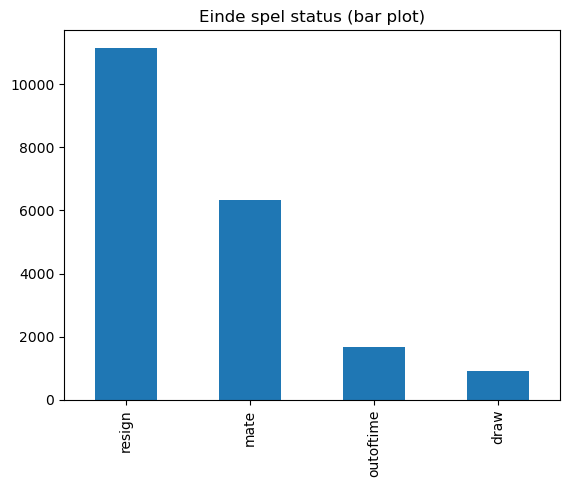

In [4]:
chess['victory_status'].value_counts().plot(kind='bar', title='Einde spel status (bar plot)')

<AxesSubplot:title={'center':'Status einde spel (pie chart)'}, ylabel='victory_status'>

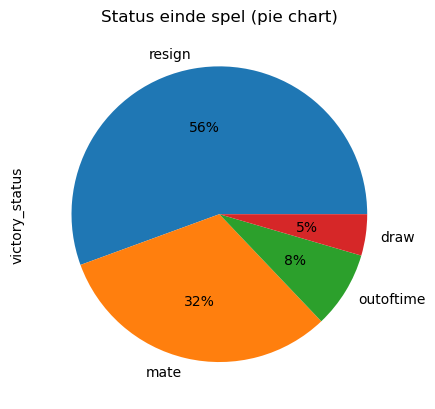

In [5]:
chess['victory_status'].value_counts().plot(kind='pie', autopct='%1.0f%%', title='Status einde spel (pie chart)')

#### Observeringen
- De meeste spellen worden beeindigd door opgave (56%)
- Een gelijkspel komt het minst voor (5%)

### 6.2.2 Rated
Gegeven die beschrijft of een spel voor punten word gespeeld

In [6]:
chess['rated'].unique()

array([False,  True])

In [7]:
chess['rated'].value_counts()

True     16155
False     3903
Name: rated, dtype: int64

<AxesSubplot:title={'center':'Spel voor punten? (bar plot)'}>

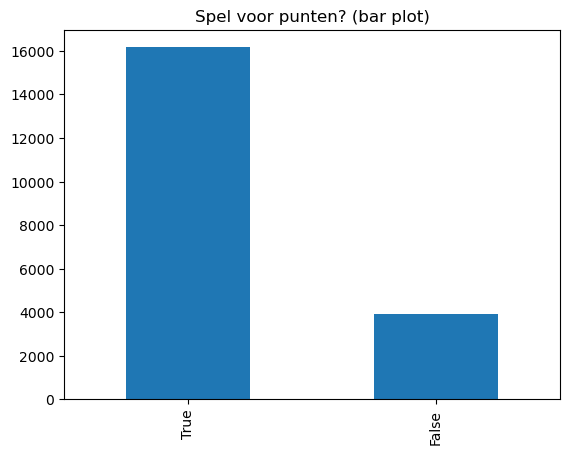

In [8]:
chess['rated'].value_counts().plot(kind='bar', title='Spel voor punten? (bar plot)')

<AxesSubplot:title={'center':'Spel voor punten? (pie chart)'}, ylabel='rated'>

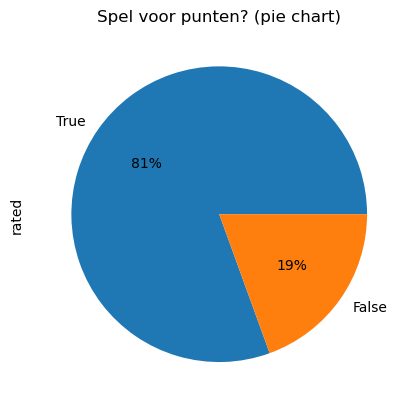

In [9]:
chess['rated'].value_counts().plot(kind='pie', autopct='%1.0f%%', title='Spel voor punten? (pie chart)')

#### Observeringen
- De meeste potjes worden voor een rating gespeeld (81%)

### 6.2.3 Winner
Gegeven die aangeeft wie het potje gewonnen heeft

In [10]:
chess['winner'].unique()

array(['white', 'black', 'draw'], dtype=object)

In [11]:
chess['winner'].value_counts()

white    10001
black     9107
draw       950
Name: winner, dtype: int64

<AxesSubplot:title={'center':'Winnaar (bar plot)'}>

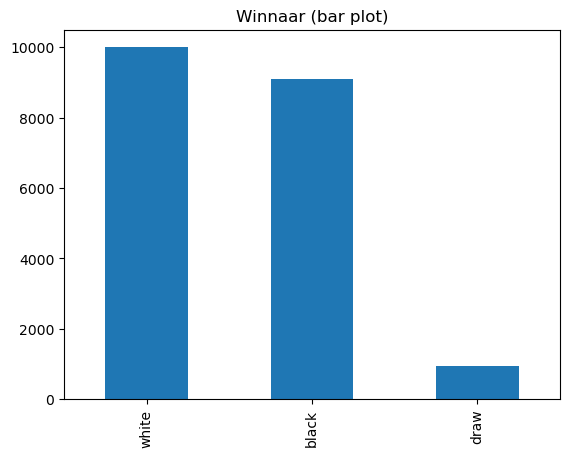

In [12]:
chess['winner'].value_counts().plot(kind='bar', title='Winnaar (bar plot)')

<AxesSubplot:title={'center':'Winnaar (pie chart)'}, ylabel='winner'>

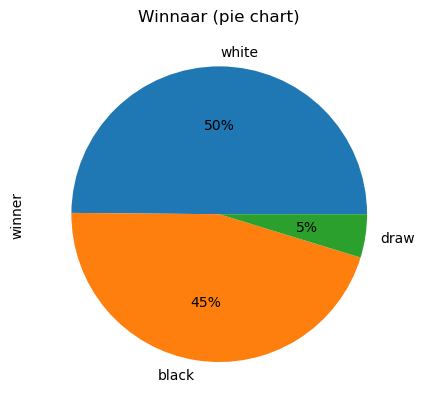

In [13]:
chess['winner'].value_counts().plot(kind='pie', autopct='%1.0f%%', title='Winnaar (pie chart)')

#### Observeringen
- Wit wint iets vaker dan zwart (50% wit, 45% zwart)
    - Dit is logisch, wit mag namelijk beginnen

## 6.3 Univariate analysis (Numerical data)
- Turns (Aantal zetten tijdens het potje)
- combined_rating (Rating van wit en zwart samen) 

### 6.3.1 combined_rating
De rating van beide spelers (wit en zwart) bij elkaar opgeteld. Deze kolom bestaat niet in de dataset. Deze moet dus eerst aangemaakt worden met de som (Rating zwart + Rating wit)

In [14]:
chess['combined_rating'] = chess['white_rating'] + chess['black_rating']

In [15]:
chess['combined_rating'].describe()

count    20058.000000
mean      3185.463855
std        526.347651
min       1633.000000
25%       2813.000000
50%       3137.500000
75%       3542.000000
max       4951.000000
Name: combined_rating, dtype: float64

<AxesSubplot:title={'center':'Rating zwart+wit (boxplot)'}>

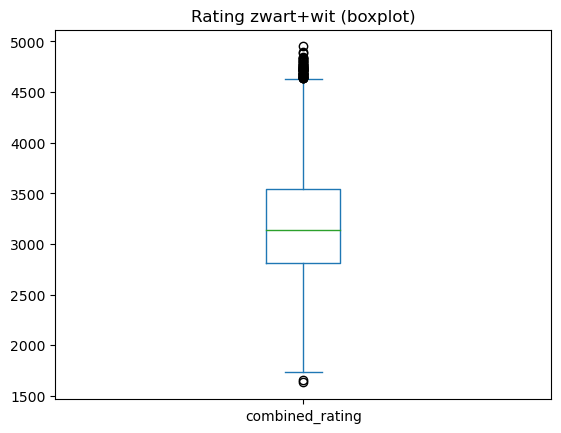

In [16]:
chess['combined_rating'].plot(kind='box', title='Rating zwart+wit (boxplot)')

<AxesSubplot:title={'center':'Rating zwart+wit (histogram)'}, ylabel='Frequency'>

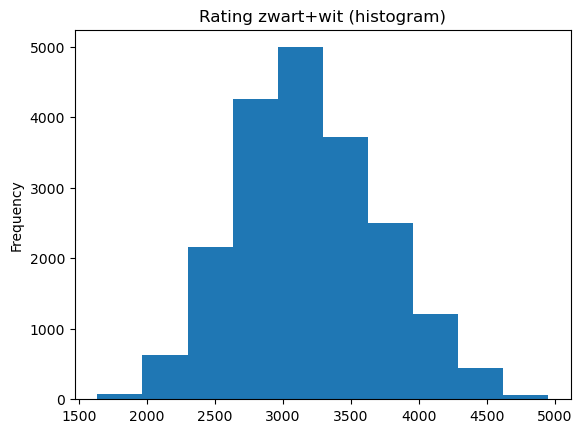

In [17]:
chess['combined_rating'].plot(kind='hist', title='Rating zwart+wit (histogram)')

#### Observeringen
- De rating van zwart en wit samen kent een grote standaard deviatie. Er zitten dus veel verschillende waarden in de dataset
- Het gemiddelde en de middelpunt van de dataset liggen dicht bij elkaar. De dataset is dus bijna symmetrisch verdeeld.

### 6.3.2 Turns
Het aantal zetten die tijdens het potje gespeeld zijn

In [18]:
chess['turns'].describe()

count    20058.000000
mean        60.465999
std         33.570585
min          1.000000
25%         37.000000
50%         55.000000
75%         79.000000
max        349.000000
Name: turns, dtype: float64

<AxesSubplot:title={'center':'Aantal zetten (boxplot)'}>

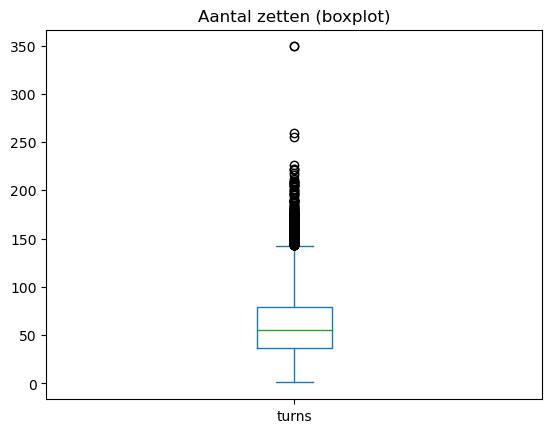

In [19]:
chess['turns'].plot(kind='box', title='Aantal zetten (boxplot)')

<AxesSubplot:title={'center':'Aantal zetten (histogram)'}, ylabel='Frequency'>

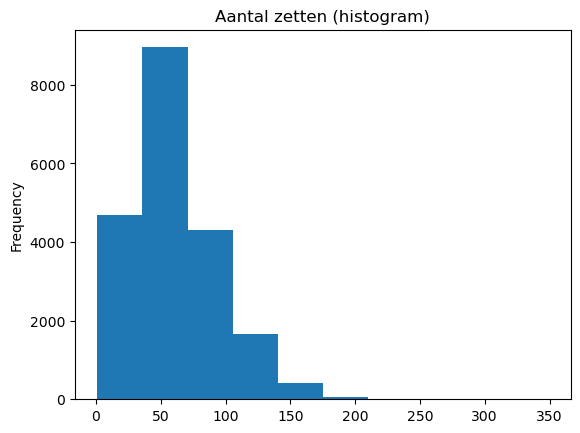

In [20]:
chess['turns'].plot(kind='hist', title='Aantal zetten (histogram)')

In [21]:
withoutTurnOutliers = chess["turns"][chess["turns"] < 135]
withoutTurnOutliers.describe()

count    19423.000000
mean        57.398754
std         29.186498
min          1.000000
25%         36.000000
50%         54.000000
75%         76.000000
max        134.000000
Name: turns, dtype: float64

<AxesSubplot:title={'center':'Aantal zetten zonder uitschieters (turns < 135) (boxplot)'}>

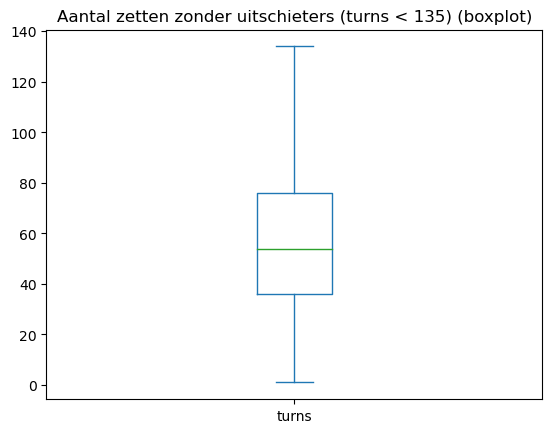

In [22]:
withoutTurnOutliers.plot(kind='box', title='Aantal zetten zonder uitschieters (turns < 135) (boxplot)')

<AxesSubplot:title={'center':'Aantal zetten zonder uitschieters (turns < 135) (histogram)'}, ylabel='Frequency'>

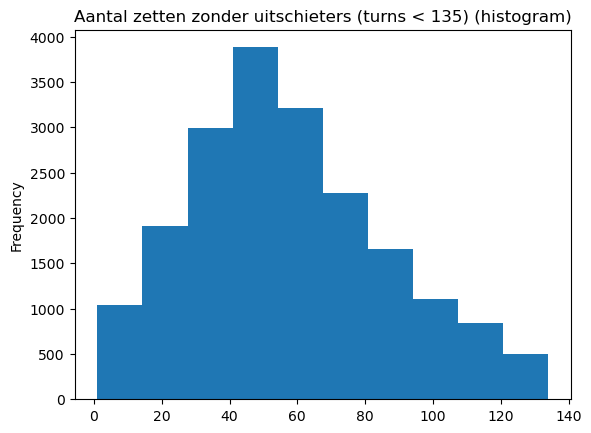

In [23]:
withoutTurnOutliers.plot(kind='hist', title='Aantal zetten zonder uitschieters (turns < 135) (histogram)')

#### Observeringen
- Het aantal zetten kent een erg hoge standaard deviatie. Dit betekend dat er grote verschillen in de data zijn
- De grote verschillen in het aantal zetten is ook terug te zien in een boxplot. Er zijn namelijk veel uitschieters
- Zonder uitschieters is een klein verschil tussen het gemmiddelde en het middenpunt te zien. De data is dus veel beter verdeeld (symmetrie)